In [22]:
# Install required packages if necessary
"""
%pip install matplotlib
%pip install sklearn
%pip install pandas
"""

'\n%pip install matplotlib\n%pip install sklearn\n%pip install pandas\n'

In [2]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
import pandas as pd

[[0.665641052, -1.891825688], [1.022548874, -0.744242705], [1.038990197, 1.066306147], [-1.352675921, 0.383138066], [1.055635545, 0.765919494], [2.380620878, 1.190491521], [1.013243419, 1.070894726], [-1.839749776, -1.554080412], [1.477055248, 0.907292357], [0.512974624, -0.436247555], [1.245255593, -0.988142307], [-1.996572287, -0.443151821], [-0.794621469, -1.547377629], [0.701346499, 1.5982964], [-0.824056261, -0.696685515], [1.209253342, 0.252053358], [-0.85334681, -1.077484281], [0.577915128, -1.342472293], [-0.005636139, -0.88593431], [-0.326186375, -1.715555657], [0.422084882, -0.842526595], [0.608602671, 1.126401456], [1.465299645, 1.818113875], [0.641459624, 1.128819338], [1.636918898, -0.842038449], [0.91975567, 0.019091016], [-0.665427561, 0.886736356], [-1.395675078, -1.309161584], [-1.324070553, -1.107318724], [-0.617694708, -0.969412229], [-0.426342807, 0.941110573], [0.384162216, 1.060335652], [-1.894543215, -0.749152676], [2.024180953, 0.566301432], [-1.0944872, -0.9931

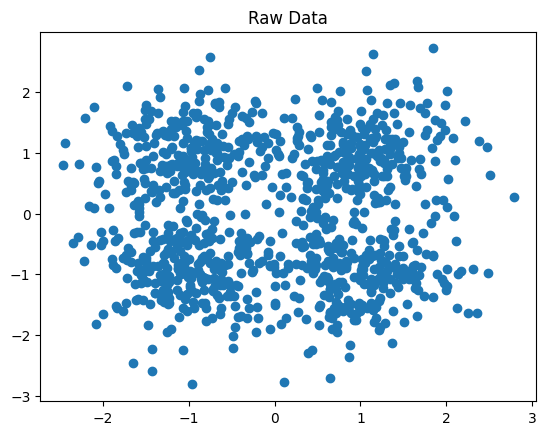

In [12]:
### Read data from the CSV file ###

# Get data from the CSV as a Pandas DataFrame
data_frame = pd.read_csv('cluster_data.csv')
X = data_frame.values.tolist() # List of data points (for clustering)

X_T = data_frame.T.values.tolist()
X1 = X_T[0] # List of x-axis values (for plotting)
X2 = X_T[1] # List of y-axis values (for plotting)

# Plot the data as a scatter plot
plt.scatter(X1, X2)
plt.title("Raw Data")

print(X)

/home/jren/miniconda3/envs/PAL_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/jren/miniconda3/envs/PAL_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/jren/miniconda3/envs/PAL_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/jren/miniconda3/envs/PAL_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: 

Text(0, 0.5, 'Mean Silhouette Score')

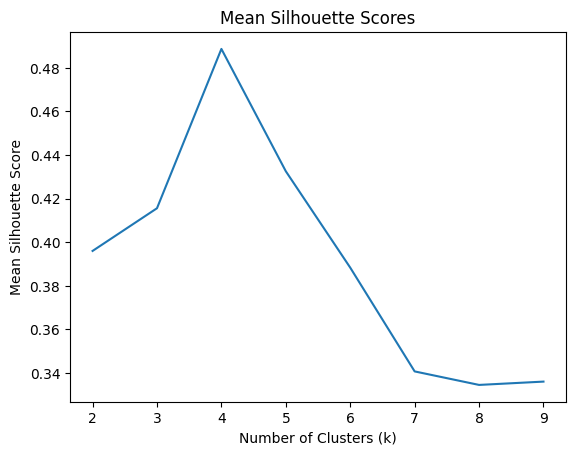

In [13]:
### Determine optimal number of clusters using silhouette scores ###

sil_scores = [] # List of mean silhouette scores
k_vals = [] # List of k-values tried

# Iterate through a range of k-values
for k in range(2,10):
    k_vals.append(k)
    # Fit a k-means model on our data
    model = KMeans(n_clusters=k)
    model.fit(X) 

    # Calculate the mean silhouette score 
    sil = metrics.silhouette_score(X, model.labels_, metric='euclidean')
    sil_scores.append(sil)

# Plot the silhouette scores
plt.plot(k_vals, sil_scores) 
plt.title("Mean Silhouette Scores")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Mean Silhouette Score")


/home/jren/miniconda3/envs/PAL_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0.5, 1.0, 'Clustered Data')

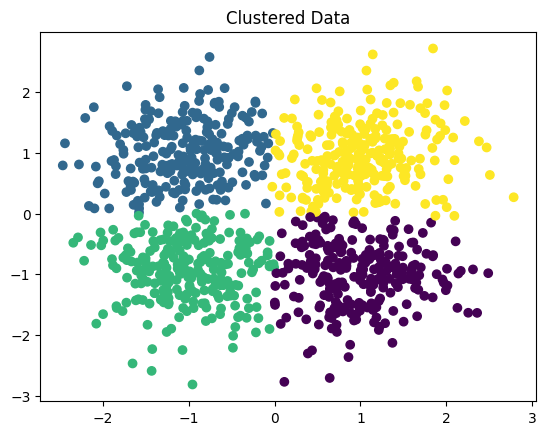

In [15]:
### Run k-means clustering ###

# Fit a k-means model on the data using k = 4 clusters
model = KMeans(n_clusters = 4)
model.fit(X)
y_pred = model.predict(X)

# Plot the results
plt.scatter(X1, X2, c=y_pred)
plt.title("Clustered Data")
